## Features of AutoEncoder
1. Denoise the image using DeepLearning
2. Anomaly Detection with Keras, Tensorflow, Deep Learning
3. Compressing the image to a latent space


## AutoEncoder to Increase Resolution
Denoising autoencoder is just the extension of simple autoencoders.
Vincent et al 2008 ICML Paper, extracting and composing robust features with denoising autoencoders - the author found that they can imporve the robustness of the internal layers - latent space representation - by purposely inducing the noise to their signal

They were invented to help
1. Hidden layer to learn more robust features
2. Reduce risk of overfitting in autoencoder
3. Prevent autoencoder to learn a simple identity function (that would make it just repeat what is entered into the input)



In [20]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, Activation
from tensorflow.keras.layers import Flatten, Dense, Reshape, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [29]:
# Creating the AutoEncoder Model - input and output same
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense( 32, activation='relu')) # symmetric centroid
model.add(Dense(128, activation='relu'))
model.add(Dense(10000, activation='sigmoid'))

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# we will forget about the y part or the lables of images 
# with labels it is - supervised
# without labels it is - unsupervised - 
# we dont know what is round known as (p.s. zero)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# input of auto encoder is 784 - so single dimensional matrix as input
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test  = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))


In [31]:
trainXLarge = np.array([cv2.resize(img,(100,100)) for img in trainX]) 
testXLarge = np.array([cv2.resize(img, (100,100)) for img in testX])

trainXLarge = trainXLarge.reshape(trainXLarge.shape[0], np.prod(trainXLarge.shape[1:]))
testXLarge = testXLarge.reshape(testXLarge.shape[0], np.prod(testXLarge.shape[1:]))

In [32]:
trainXLarge.shape

(60000, 10000)

In [34]:
# training the model - but why binary crossentropy? okay due to 2 color class either black or white 784 pixels
# and so not categorical
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(x_train, trainXLarge, epochs=3, validation_data=(x_test, testXLarge))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1130 - accuracy: 0.7471 - val_loss: 0.1116 - val_accuracy: 0.7465
Epoch 2/3
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1118 - accuracy: 0.7471 - val_loss: 0.1105 - val_accuracy: 0.7465
Epoch 3/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1109 - accuracy: 0.7472 - val_loss: 0.1096 - val_accuracy: 0.7465


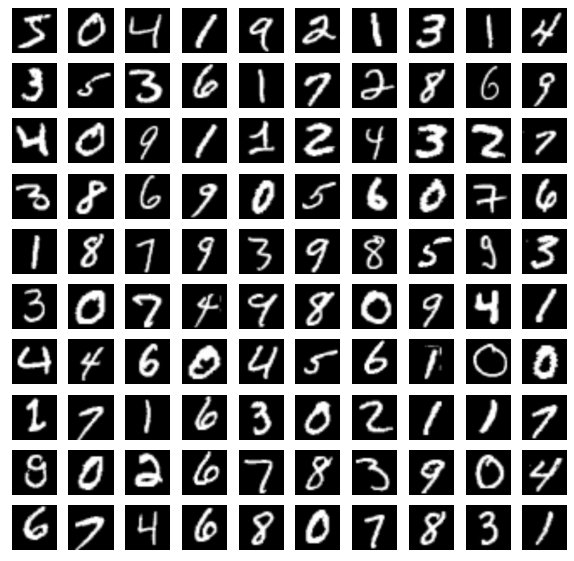

In [36]:
plt.figure(figsize=(10, 10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    img = trainXLarge[i].reshape(100,100)
    plt.imshow(img, cmap='gray')

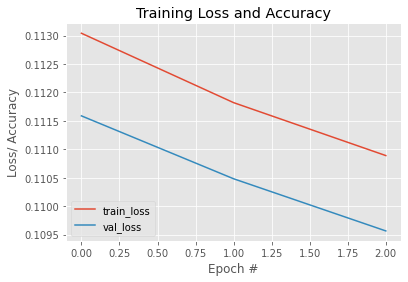

In [35]:
N = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/ Accuracy')
plt.legend(loc='lower left')
plt.savefig('train_logs_size.jpg')

# Visualizing the Results

In [38]:
decoded = model.predict(x_test)
# testXLarge is the output 

In [42]:
decoded.shape

(10000, 10000)

True

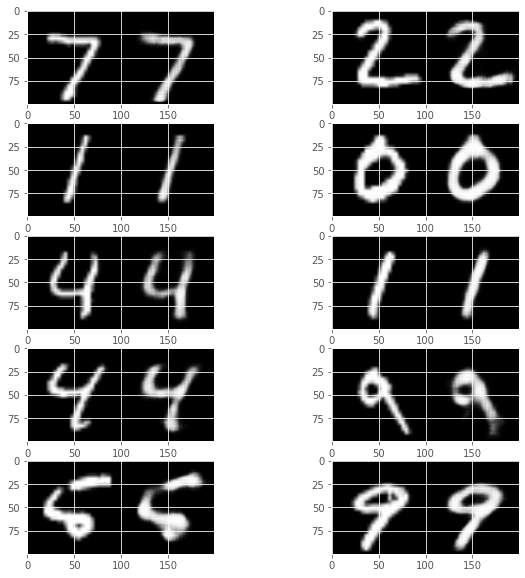

In [44]:
outputs = None

plt.figure(figsize=(10,10))

for i in range(0, 10):
    original = (x_test[i]*255).astype('uint8').reshape(28,28)
    original = cv2.resize(original, (100,100))
    recon = (decoded[i]*255).astype('uint8').reshape(100,100)
    
    output = np.hstack([original, recon])
    plt.subplot(5,2,i+1)
    plt.imshow(output, cmap='gray')
    if outputs is None:
        outputs = output
    else:
        outputs = np.vstack([outputs, output])

cv2.imwrite('final_recon_resize.jpg', outputs)

## Conclusion

We can clearly see that denoising autoencoder was able to recover the original signal from the images while removing the noise

AutoEncoder can be used to automatically pre-process the images to facilitate better ocr accuracy.

In the case of face recognition - this autoencoder can work with normal images with noise and generate the faces without noise - that enhances the accuracy of face recognition algorithm.